# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
boston = pd.read_csv('boston_data.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [9]:
boston.shape

(404, 14)

In [2]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [4]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

<AxesSubplot:>

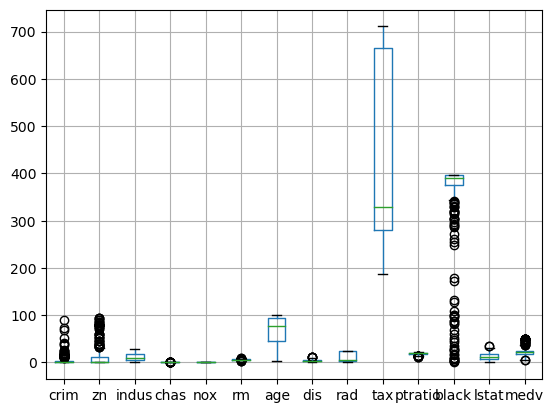

In [5]:
import numpy as np
boston.boxplot()

In [7]:
for x in ['black']:
    q75,q25 = np.percentile(boston.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    boston.loc[boston[x] < min,x] = np.nan
    boston.loc[boston[x] > max,x] = np.nan


In [8]:
boston.isnull().sum()

crim        0
zn          0
indus       0
chas        0
nox         0
rm          0
age         0
dis         0
rad         0
tax         0
ptratio     0
black      61
lstat       0
medv        0
dtype: int64

In [12]:
boston.fillna(boston['black'].median(), inplace=True)
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

<AxesSubplot:xlabel='rm', ylabel='medv'>

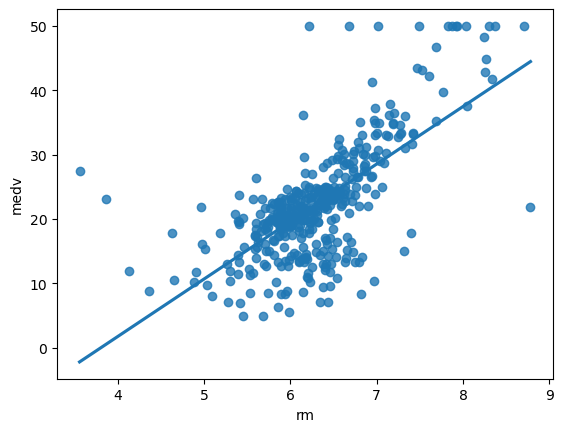

In [23]:
# Your plots here
import seaborn as sns
%matplotlib inline
sns.regplot(x = "rm",
            y = "medv", 
            ci = None,
            data = boston)

<AxesSubplot:xlabel='dis', ylabel='medv'>

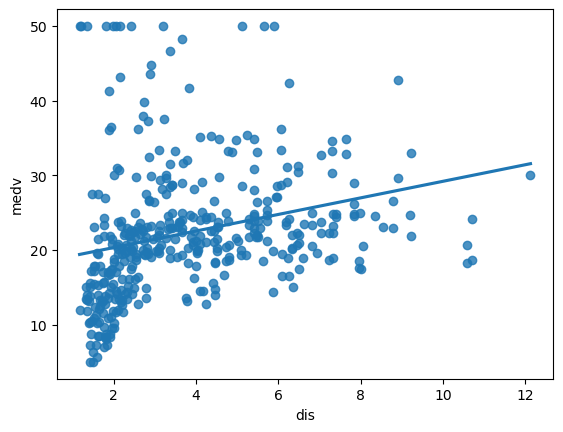

In [24]:
# Your plots here
import seaborn as sns
%matplotlib inline
sns.regplot(x = "dis",
            y = "medv", 
            ci = None,
            data = boston)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

The scatter plot matrix provides a visual representation of the relationships between the features and the target variable, and the histogram of the target variable shows its distribution across the dataset.

From the scatter plot matrix, we can see that there are some features that have a strong positive correlation with the target variable (e.g., RM, the average number of rooms per dwelling), while others have a negative correlation (e.g., LSTAT, the percentage of lower status of the population). Some features appear to have a weak correlation with the target variable (e.g., AGE, the proportion of owner-occupied units built prior to 1940).

These relationships are generally what we would expect based on our intuition about what factors affect home prices. For example, homes with more rooms tend to be more expensive than those with fewer rooms, and homes in areas with lower socio-economic status tend to be less expensive than those in more affluent areas.

Overall, the scatter plot matrix and histogram provide a useful tool for exploring the relationships between the features and the target variable and can help identify which features are likely to be important for predicting home prices.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

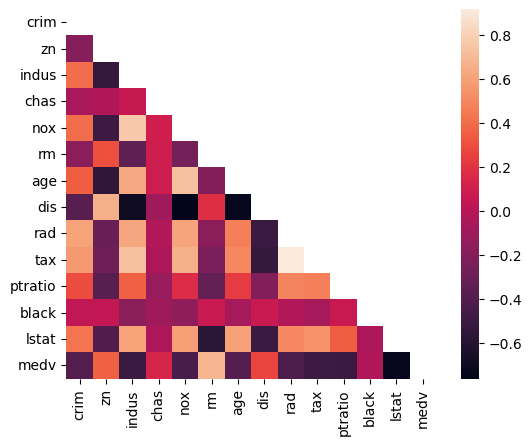

In [27]:
# Calculate correlation between each pair of variable
corr_matrix=boston.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [31]:
# Your code here
df = pd.DataFrame(boston)
df.describe

<bound method NDFrame.describe of          crim    zn  indus  chas    nox     rm    age     dis   rad    tax  \
0     0.15876   0.0  10.81   0.0  0.413  5.961   17.5  5.2873   4.0  305.0   
1     0.10328  25.0   5.13   0.0  0.453  5.927   47.2  6.9320   8.0  284.0   
2     0.34940   0.0   9.90   0.0  0.544  5.972   76.7  3.1025   4.0  304.0   
3     2.73397   0.0  19.58   0.0  0.871  5.597   94.9  1.5257   5.0  403.0   
4     0.04337  21.0   5.64   0.0  0.439  6.115   63.0  6.8147   4.0  243.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
399   9.32909   0.0  18.10   0.0  0.713  6.185   98.7  2.2616  24.0  666.0   
400  51.13580   0.0  18.10   0.0  0.597  5.757  100.0  1.4130  24.0  666.0   
401   0.01501  90.0   1.21   1.0  0.401  7.923   24.8  5.8850   1.0  198.0   
402   0.02055  85.0   0.74   0.0  0.410  6.383   35.7  9.1876   2.0  313.0   
403   0.08244  30.0   4.93   0.0  0.428  6.481   18.5  6.1899   6.0  300.0   

     ptratio   black  lstat  

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [32]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [34]:
# Your code here
from sklearn.model_selection import train_test_split

y = boston['medv']
X = boston.drop(['medv'], axis=1)
# X represents the input features and y represents the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# The test_size parameter specifies the proportion of the dataset to include in the test split
# The random_state parameter ensures that the same random sequence is generated every time you run the code
# The shuffle parameter specifies whether to shuffle the data before splitting. By default, it is set to True.

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [42]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

# X_train and y_train represent the training data, X_test and y_test represent the test data
max_depth_values = [2, 4, 6, 8, 10]
train_scores = []
test_scores = []

for depth in max_depth_values:
    # Create a Random Forest Regressor with the current value of max_depth
    regressor = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=42)
    
    # Train the model using the training data
    regressor.fit(X_train, y_train)

    # Evaluate the model using the training data and store the R-squared score
    y_train_pred = regressor.predict(X_train)
    train_score = r2_score(y_train, y_train_pred)
    train_scores.append(train_score)
    print("max_depth = {}, R-squared train_score = {:.2f}".format(depth, train_score))


    # Evaluate the model using the test data and print the R-squared score
    y_test_pred = regressor.predict(X_test)
    test_score = r2_score(y_test, y_test_pred)
    test_scores.append(test_score)
    print("max_depth = {}, R-squared test_score = {:.2f}".format(depth, test_score))


max_depth = 2, R-squared train_score = 0.78
max_depth = 2, R-squared test_score = 0.61
max_depth = 4, R-squared train_score = 0.92
max_depth = 4, R-squared test_score = 0.68
max_depth = 6, R-squared train_score = 0.96
max_depth = 6, R-squared test_score = 0.72
max_depth = 8, R-squared train_score = 0.97
max_depth = 8, R-squared test_score = 0.72
max_depth = 10, R-squared train_score = 0.97
max_depth = 10, R-squared test_score = 0.72


Now, plot the score for each tree on the training set and on the testing set.

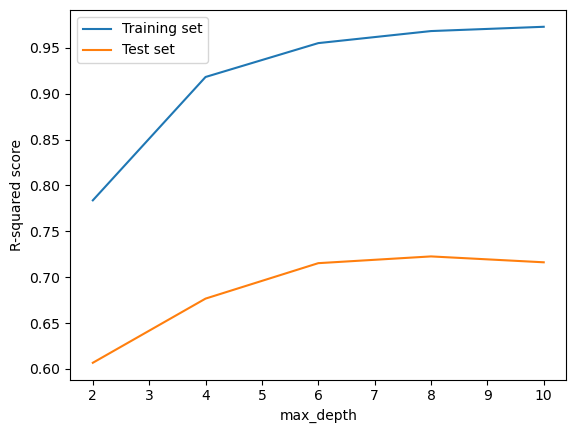

In [45]:
# Produce a plot with the score for the testing and training for the different max depths
import matplotlib.pyplot as plt

# Plot the performance on the training and test sets for each value of max_depth
plt.plot(max_depth_values, train_scores, label='Training set')
plt.plot(max_depth_values, test_scores, label='Test set')
plt.xlabel('max_depth')
plt.ylabel('R-squared score')
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

As the depth of the trees increases, the model becomes more complex and can fit the training data more closely. This results in a higher R-squared score for the training set. However, if the model is too complex, it may start to overfit the training data and not generalize well to new data. This results in a lower R-squared score for the test set.

Based on the plot, we can see that the best performance on the test set is achieved at max_depth values of around 4-6. After this point, the performance on the test set starts to decline, indicating that the model is overfitting the training data. Therefore, we can conclude that the optimal max_depth for this problem is likely around 4-6.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

When the model is trained with a maximum depth of 1, it suffers from high bias and low variance. A model with a maximum depth of 1 is very simple and has very few parameters. As a result, it is not able to capture the complexity of the data and is likely to underfit the training data. This leads to high bias, which is the error that is introduced by approximating a real-world problem with a simplified model.

On the other hand, when the model is trained with a maximum depth of 10, it suffers from high variance and low bias. A model with a maximum depth of 10 is very complex and has many parameters. As a result, it is able to capture the complexity of the data very well, but it may also overfit the training data. This leads to high variance, which is the error that is introduced by sensitivity to small fluctuations in the training data.

In general, there is a trade-off between bias and variance in machine learning models. A model that is too simple (low complexity) will have high bias and low variance, while a model that is too complex (high complexity) will have low bias and high variance. The goal is to find the right balance between bias and variance that allows the model to generalize well to new data.





### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

Based on the plot of R-squared scores for the training and test sets as a function of max_depth, the optimal max_depth value for this problem appears to be around 4-6.

To find the best-guess optimal model, I would train a Random Forest Regressor with max_depth=5 (midpoint between 4 and 6). This value is likely to provide a good balance between bias and variance, allowing the model to capture the complexity of the data without overfitting the training data.

After training the model, I would evaluate its performance on the test set using metrics such as R-squared score, mean squared error, and mean absolute error. If the performance on the test set is good, it would indicate that the model is able to generalize well to new data and that max_depth=5 is a good choice. If the performance on the test set is poor, I would try other values of max_depth until I find the best value.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

Data relevancy: The data used to train and test the model was collected in 1978, which means that it may not be relevant today as there could have been changes in demographics, property values, and other factors that could affect the target variable. Therefore, the model may not generalize well to modern data.

Features sufficiency: The model uses only 13 features to describe a home. While some of these features may be important, others may not be relevant, and there may be other features that could affect the target variable that are not included in the dataset.

Robustness: The model's performance may not be robust enough to make consistent predictions across different datasets. The model's accuracy on the test set is good, but there may be other datasets where the model does not perform as well.

Applicability: The data used to train and test the model was collected in an urban city like Boston, which means that the model may not be applicable to rural cities where the distribution of features could be different. In such cases, it may be necessary to train a separate model that is specific to the target region.

Overall, while the constructed model is a good starting point, it may not be suitable for a real-world setting without further modifications and validation.